https://github.com/DataTalksClub/mlops-zoomcamp/tree/main/cohorts/2023/02-experiment-tracking

## Homework with Weights & Biases

The goal of this homework is to get familiar with Weights & Biases for experiment tracking, model management, hyperparameter optimization, and many more.

# Q1. Install the Package

To get started with Weights & Biases you'll need to install the appropriate Python package.

For this we recommend creating a separate Python environment, for example, you can use [conda environments](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-envs), 
and then install the package there with `pip` or `conda`.

Following are the libraries you need to install:

* `pandas`
* `matplotlib`
* `scikit-learn`
* `pyarrow`
* `wandb`

Once you installed the package, run the command `wandb --version` and check the output.

What's the version that you have?

In [2]:
!wandb --version

wandb, version 0.15.3


Answer: __0.15.3__

# Q2. Download and preprocess the data

We'll use the Green Taxi Trip Records dataset to predict the amount of tips for each trip. 

Download the data for January, February and March 2022 in parquet format from [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

Use the script `preprocess_data.py` located in the folder [`homework-wandb`](homework-wandb) to preprocess the data.

The script will:

* initialize a Weights & Biases run.
* load the data from the folder `<TAXI_DATA_FOLDER>` (the folder where you have downloaded the data),
* fit a `DictVectorizer` on the training set (January 2022 data),
* save the preprocessed datasets and the `DictVectorizer` to your Weights & Biases dashboard as an artifact of type `preprocessed_dataset`.

Your task is to download the datasets and then execute this command:

```bash
python preprocess_data.py \
  --wandb_project <WANDB_PROJECT_NAME> \
  --wandb_entity <WANDB_USERNAME> \
  --raw_data_path <TAXI_DATA_FOLDER> \
  --dest_path ./output
```

Tip: go to `02-experiment-tracking/homework-wandb/` folder before executing the command and change the value of `<WANDB_PROJECT_NAME>` to the name of your Weights & Biases project, `<WANDB_USERNAME>` to your Weights & Biases username, and `<TAXI_DATA_FOLDER>` to the location where you saved the data.

In [4]:
!python homework-wandb/preprocess_data.py \
    --wandb_project mlops-green-taxi \
    --wandb_entity avisprof \
    --raw_data_path ../../data \
    --dest_path ./output

wandb: Currently logged in as: avisprof. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.15.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /mnt/w/ml/mlops/homeworks/03-wandb/wandb/run-20230607_110247-bx4kyg4m
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run wise-lake-1
wandb: ⭐️ View project at https://wandb.ai/avisprof/mlops-green-taxi
wandb: 🚀 View run at https://wandb.ai/avisprof/mlops-green-taxi/runs/bx4kyg4m
wandb: Adding directory to artifact (./output)... Done. 0.1s
wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run wise-lake-1 at: https://wandb.ai/avisprof/mlops-green-taxi/runs/bx4kyg4m
wandb: Synced 6 W&B file(s), 0 media file(s), 6 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230607_110247-bx4kyg4m/logs


Once you navigate to the `Files` tab of your artifact on your Weights & Biases page, what's the size of the saved `DictVectorizer` file?

In [6]:
!ls -lah ./output | grep dv

-rwxrwxrwx 1 wsl wsl 151K Jun  7 11:02 dv.pkl


Answer: __154K__

# Q3. Train a model with Weights & Biases logging

We will train a `RandomForestRegressor` (from Scikit-Learn) on the taxi dataset.

We have prepared the training script `train.py` for this exercise, which can be also found in the folder `homework-wandb`. 

The script will:

* initialize a Weights & Biases run.
* load the preprocessed datasets by fetching them from the Weights & Biases artifact previously created,
* train the model on the training set,
* calculate the MSE score on the validation set and log it to Weights & Biases,
* save the trained model and log it to Weights & Biases as a model artifact.

Your task is to modify the script to enable to add Weights & Biases logging, execute the script and then check the Weights & Biases run UI to check that the experiment run was properly tracked.

TODO 1: log `mse` to Weights & Biases under the key `"MSE"`

`wandb.log({'MSE': mse})`

TODO 2: log `regressor.pkl` as an artifact of type `model`, refer to the [official docs](https://docs.wandb.ai/guides/artifacts) in order to know more about logging artifacts.

`artifact = wandb.Artifact('RandomForestRegressor', type='model')`
<br>`artifact.add_file("regressor.pkl")`
<br>`wandb.log_artifact(artifact)`

In [8]:
# Run the script
!python homework-wandb/train.py \
  --wandb_project mlops-green-taxi \
  --wandb_entity avisprof \
  --data_artifact "avisprof/mlops-green-taxi/NYC-Taxi:v0"

wandb: Currently logged in as: avisprof. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.15.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /mnt/w/ml/mlops/homeworks/03-wandb/wandb/run-20230607_112028-8ug2crmo
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run rosy-resonance-2
wandb: ⭐️ View project at https://wandb.ai/avisprof/mlops-green-taxi
wandb: 🚀 View run at https://wandb.ai/avisprof/mlops-green-taxi/runs/8ug2crmo
wandb:   4 of 4 files downloaded.  
wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb: MSE ▁
wandb: 
wandb: Run summary:
wandb: MSE 2.45398
wandb: 
wandb: 🚀 View run rosy-resonance-2 at: https://wandb.ai/avisprof/mlops-green-taxi/runs/8ug2crmo
wandb: Synced 6 W&B file(s), 0 media file(s), 3 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230607_112028-8ug2crmo/

Once you have successfully ran the script, navigate the `Overview` section of the run in the Weights & Biases UI and scroll down to the `Configs`. What is the value of the `max_depth` parameter:

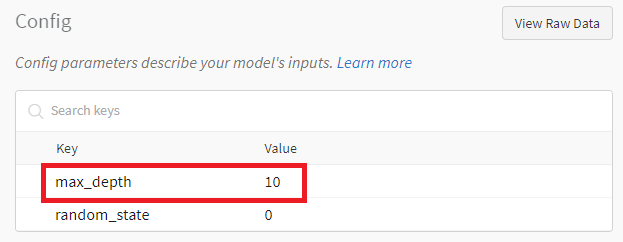

Answer: __10__

# Q4. Tune model hyperparameters

Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using [Weights & Biases Sweeps](https://docs.wandb.ai/guides/sweeps). We have prepared the script `sweep.py` for this exercise in the `homework-wandb` directory.

Your task is to modify `sweep.py` to pass the parameters `n_estimators`, `min_samples_split` and `min_samples_leaf` from `config` to `RandomForestRegressor` inside the `run_train()` function. Then we will run the sweep to figure out not only the best best of hyperparameters for training our model, but also to analyze the most optimum trends in different hyperparameters.

In [9]:
# Run the sweep using:
!python homework-wandb/sweep.py \
    --wandb_project mlops-green-taxi \
    --wandb_entity avisprof \
    --data_artifact "avisprof/mlops-green-taxi/NYC-Taxi:v0"

Create sweep with ID: 7a3d7uob
Sweep URL: https://wandb.ai/avisprof/mlops-green-taxi/sweeps/7a3d7uob
wandb: Agent Starting Run: fb2mio3n with config:
wandb: 	max_depth: 2
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 21
wandb: Currently logged in as: avisprof. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.15.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /mnt/w/ml/mlops/homeworks/03-wandb/wandb/run-20230607_112637-fb2mio3n
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run feasible-sweep-1
wandb: ⭐️ View project at https://wandb.ai/avisprof/mlops-green-taxi
wandb: 🧹 View sweep at https://wandb.ai/avisprof/mlops-green-taxi/sweeps/7a3d7uob
wandb: 🚀 View run at https://wandb.ai/avisprof/mlops-green-taxi/runs/fb2mio3n
wandb:   4 of 4 files downloaded.  
wandb: Waiting for W&B process to finish... (success).


This command will run the sweep for 5 iterations using the **Bayesian Optimization and HyperBand** method proposed by the paper [BOHB: Robust and Efficient Hyperparameter Optimization at Scale](https://arxiv.org/abs/1807.01774). You can take a look at the sweep on your Weights & Biases dashboard, take a look at the **Parameter Inportance Panel** and the **Parallel Coordinates Plot** to determine, and analyze which hyperparameter is the most important:

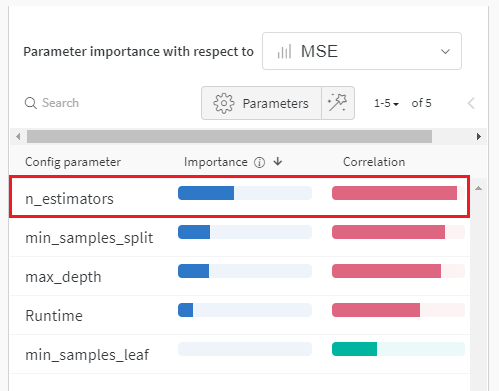

Answer: __n_estimators__

# Q5. Link the best model to the model registry

Now that we have obtained the optimal set of hyperparameters and trained the best model, we can assume that we are ready to test some of these models in production. In this exercise, you'll create a model registry and link the best model from the Sweep to the model registry.

First, you will need to create a Registered Model to hold all the candidate models for your particular modeling task. You can refer to [this section](https://docs.wandb.ai/guides/models/walkthrough#1-create-a-new-registered-model) of the official docs to learn how to create a registered model using the Weights & Biases UI.

Once you have created the Registered Model successfully, you can navigate to the best run of your sweep, navigate to the model artifact created by the particular run, and click on the Link to Registry option from the UI. This would link the model artifact to the Registered Model. You can choose to add some suitable aliases for the Registered Model, such as `production`, `best`, etc.

Now that the model artifact is linked to the Registered Model, which of these information do we see on the Registered Model UI?

* Versioning
* Metadata
* Aliases
* Metric (MSE)
* Source run
* All of these
* None of these

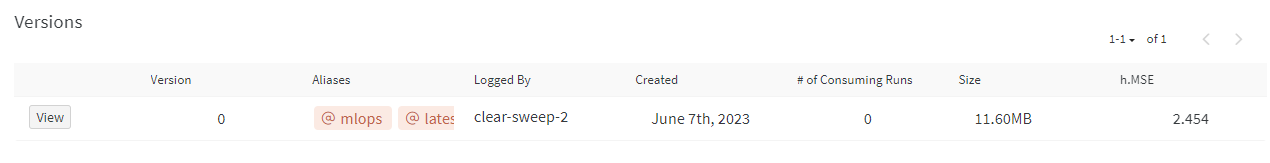

Answer: __All of these__